# Machine Learning With Regression

In [1313]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get data

In [1314]:
if not os.path.isfile('car-data.csv'):
    !wget -O "car-data.csv" "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv" 

## Prepare the Data
1. Read in with Pandas
2. Preview Data
3. Clean column for consitent naming 
4. Clean all object features for consistent naming

In [1315]:
cars_df = pd.read_csv("car-data.csv")
cars_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [1316]:
cars_df.columns = cars_df.columns.str.lower().str.replace(' ', '_')
cars_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [1317]:
string_features = list(cars_df.dtypes[cars_df.dtypes == "object"].index)
for feature in string_features:
    cars_df[feature] = cars_df[feature].str.lower().str.replace(' ', '_')

cars_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## EDA

### see each column unique values count and sample of values 

In [1318]:
for feature in cars_df.columns:
    print(feature)
    print(cars_df[feature].unique()[:6])
    print(cars_df[feature].nunique())
    print(cars_df[feature].value_counts().iloc[:6])
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan']
48
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
nissan         558
Name: make, dtype: int64

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series']
914
silverado_1500        156
tundra                140
f-150                 126
sierra_1500            90
beetle_convertible     89
tacoma                 80
Name: model, dtype: int64

year
[2011 2012 2013 1992 1993 1994]
28
2015    2170
2016    2157
2017    1668
2014     589
2012     387
2009     379
Name: year, dtype: int64

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'
 'electric']
10
regular_unleaded                  7172
premium_unleaded_(required)       2009
premium_unleaded_(recommended)    1523
flex-fuel_(unleaded/e85)           899
diesel                             154
electric                            66
Na

### Check for missing values

In [1319]:
cars_df.isnull().sum()[cars_df.isnull().sum() > 0]       

engine_fuel_type       3
engine_hp             69
engine_cylinders      30
number_of_doors        6
market_category     3742
dtype: int64

### Check distribution of target variable

<AxesSubplot:xlabel='msrp', ylabel='Count'>

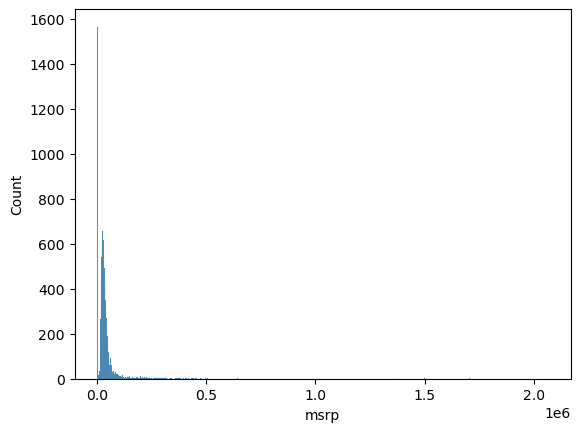

In [1320]:
sns.histplot(cars_df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

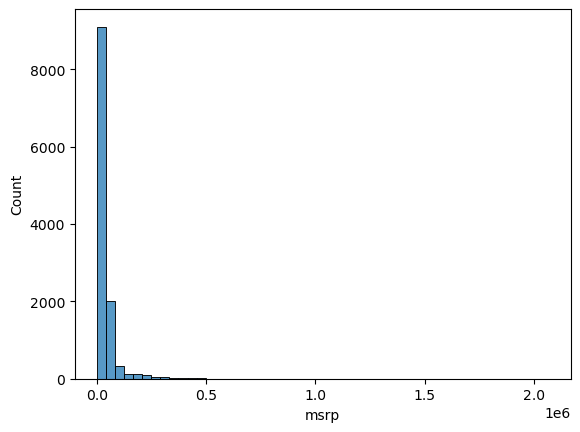

In [1321]:
#zooming in with number of bins
sns.histplot(cars_df.msrp, bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

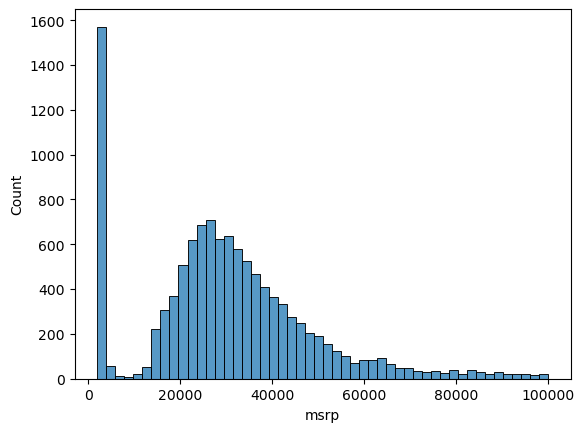

In [1322]:
#zoom in by reducing maximum price
sns.histplot(cars_df[cars_df.msrp < 100000].msrp, bins=50)

In [1323]:
#Because distribution is long tail, normalize
log1p_msrp = np.log1p(cars_df.msrp) 
log1p_msrp

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

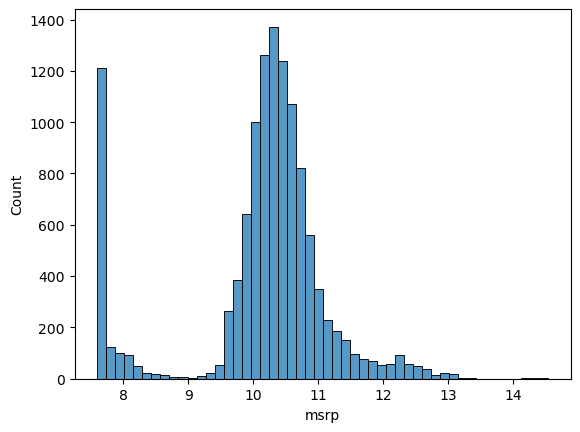

In [1324]:
sns.histplot(log1p_msrp, bins=50)

## Setting up validation framework

### Get sizes for training, validation and testing dataset

In [1325]:
n = cars_df.shape[0]
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n_val, n_test, n_train)
n, n_val+n_test+n_train

2382 2382 7150


(11914, 11914)

### shuffle dataset index for randomness

In [1326]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

### Select df_train, df_val, df_test

In [1327]:
df_train = cars_df.iloc[idx[:n_train]].reset_index(drop=True)
print(df_train.shape)
df_train.head()

(7150, 16)


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [1328]:
df_val = cars_df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
print(df_val.shape)
df_val.head()

(2382, 16)


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995


In [1329]:
df_test = cars_df.iloc[idx[n_train+n_val:]].reset_index(drop=True)
print(df_test.shape)
df_test.head()

(2382, 16)


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905


### extract y_train, y_val, y_test

In [1330]:
y_train = np.log1p(df_train.msrp.values)
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [1331]:
y_val = np.log1p(df_val.msrp.values)
y_val

array([10.19936098, 10.90872279,  9.72770457, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [1332]:
y_test = np.log1p(df_test.msrp.values)
y_test

array([ 7.60140233,  8.07464908, 10.34563811, ..., 10.27852782,
       10.00789261, 10.40414162])

### Remove MSRP from datasets

In [1333]:
if 'msrp' in df_train.columns: 
    del df_train['msrp']
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [1334]:
if 'msrp' in df_val.columns: 
    del df_val['msrp']
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873


In [1335]:
if 'msrp' in df_test.columns: 
    del df_test['msrp']
df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657


## Simple Linear Regression

### Using car 10 with 3 features

In [1336]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [1337]:
y_train[10]

13.08107460729463

In [1338]:
w0 = 7.17 #bias, a value for when we don't have any info about the car
w = [0.01, 0.04, 0.002] # weights for each features. popularity has the least contribution
x10 = list(df_train.iloc[10][['engine_hp', 'city_mpg', 'popularity']].values)
y10 = y_train[10]

x10, y10

([453.0, 11, 86], 13.08107460729463)

In [1339]:
def linear_regression(xi):
    pred = w0
    for j in range(len(xi)):
        pred += w[j] * xi[j]
    return pred

In [1340]:
pred_x10 = linear_regression(x10)
pred_x10

12.312

In [1341]:
np.expm1(pred_x10)

222347.2221101062

## Simple Linear Regression Vector Form

In [1342]:
#IMPLEMENT DOT PRODUCT
def dot(xi, w):
    res = 0.0
    for j in range(len(xi)):
        res += w[j] * xi[j]
    return res

In [1343]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [1344]:
linear_regression(x10)

12.312000000000001

### we can simplify the formalu by including the bias in the list and prepending 1 to our weights

In [1345]:
def linear_regression(xi):
    return dot([1] + xi, [w0] + w)

In [1346]:
linear_regression(x10)

12.312

### we can now update the function for multiple rows of weights

In [1347]:
def linear_regression(X):
    return X.dot([w0] + w)

In [1348]:
X = df_train.iloc[10:15][['engine_hp', 'city_mpg', 'popularity']].values
X = np.column_stack((np.ones(5),X))
X

array([[1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.820e+02, 2.000e+01, 1.385e+03],
       [1.000e+00, 1.620e+02, 2.000e+01, 4.360e+02],
       [1.000e+00, 5.530e+02, 1.600e+01, 2.774e+03],
       [1.000e+00, 2.720e+02, 1.800e+01, 3.105e+03]])

In [1349]:
predictions = linear_regression(X)
predictions

array([12.312, 12.56 , 10.462, 18.888, 16.82 ])

In [1350]:
y_train[10:15]

array([13.08107461, 10.42439221, 10.23995979, 12.20092944, 10.88183247])

## Training a Linear Regression: find [w0] + w

In [1351]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = (XTX_inv).dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [1352]:
X = df_train.iloc[10:15][['engine_hp', 'city_mpg', 'popularity']].values
y = y_train[10:15]
train_linear_regression(X, y)

(13.954739684339728,
 array([ 3.05557355e-03, -2.05578865e-01, -5.48993909e-05]))

## Applying the model to Car price data for a base model

In [1353]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X = df_train[base]
print(X.isnull().sum()) # if null exist remove it
X_train = X.fillna(0).values


engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64


In [1354]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [1355]:
w0, w = train_linear_regression(X_train, y_train)

In [1356]:
# get y_pred
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

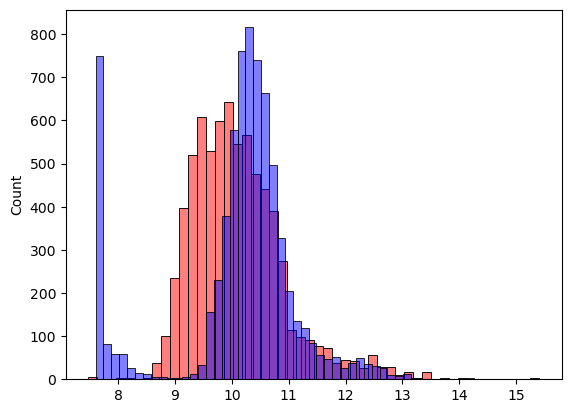

In [1357]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)

#prediction is always less than actual value, we need a way to measure model performance to trak improvement

## Implementing RMSE to measure model performance

In [1358]:
def rmse(y_pred, y):
    se = (y_pred - y) ** 2
    return np.sqrt(np.mean(se))

In [1359]:
rmse(y_pred, y_train)

0.7554192603920132

## Model Validation

In [1360]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values 
    return X

In [1361]:
X_train = prepare_X(df_train)
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [1362]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [1363]:
w0, w = train_linear_regression(X_train, y_train)

In [1364]:
# predict validation data set
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
y_pred

array([ 9.86288014, 10.37013608,  9.69868129, ..., 10.4916625 ,
        9.57091361, 10.40022147])

In [1365]:
# rmse for validation dataset
rmse(y_pred, y_val)

0.7616530991301601

## Simple Feature Engineering: Year -> Age

In [1366]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values 
    return X

In [1367]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
w0, w

(9.286850605506004,
 array([ 3.87296543e-03,  7.24889532e-02, -2.59712372e-03,  1.10445120e-02,
        -4.77015685e-05, -9.31651725e-02]))

In [1368]:
# predict validation data set
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
y_pred

array([10.24392012, 10.64842189, 10.12029397, ..., 10.86361511,
       10.21280833, 10.71044038])

In [1369]:
rmse(y_pred, y_val)

0.5172055461058335

<AxesSubplot:ylabel='Count'>

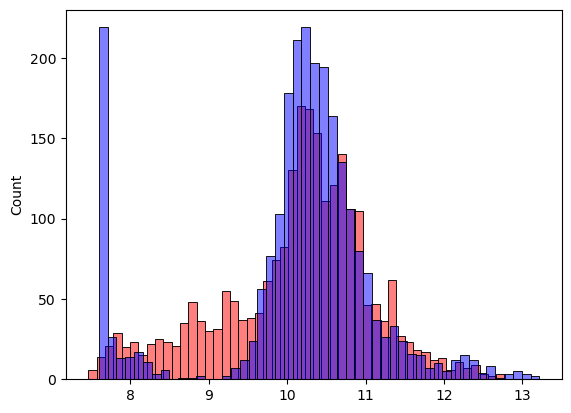

In [1370]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_val, color="blue", alpha=0.5, bins=50)

## Feature engineering: working with categorical variables number_of_doors feature

In [1371]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    for val in [2,3,4]:
        df["num_of_doors_%s" % val] = (df['number_of_doors'] == val).astype(int)
        features.append("num_of_doors_%s" % val)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values 
    return X

In [1372]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
w0, w

(10.659085118436746,
 array([ 3.71362023e-03,  7.55896758e-02, -3.94226970e-03,  1.05656089e-02,
        -4.55063701e-05, -9.45102320e-02, -1.26327322e+00, -1.47267350e+00,
        -1.30655848e+00]))

In [1373]:
# predict validation data set
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
y_pred

array([10.24775243, 10.63990796, 10.12441917, ..., 10.85886266,
       10.20968757, 10.70734736])

In [1374]:
rmse(y_pred, y_val)

0.5157995641502353

<AxesSubplot:ylabel='Count'>

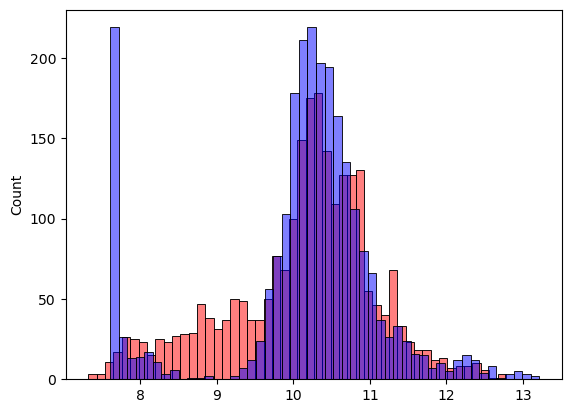

In [1375]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_val, color="blue", alpha=0.5, bins=50)

## Adding more categorical variables

In [1376]:
#extract all categorical variables
categorical_variables = list(df_train.dtypes[df_train.dtypes == 'object'].index)
categorical_variables.remove('model')
categorical_variables

['make',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [1377]:
# find the most popular values in each catgorical variables
# selecting more than 9 most popular cause linalg error due to singular matrix: LinAlgError: Singular matrix
categories = {}

for c in categorical_variables:
    categories[c] = list(cars_df[c].value_counts().head().index)
    
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [1378]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    for val in [2,3,4]:
        df["num_of_doors_%s" % val] = (df['number_of_doors'] == val).astype(int)
        features.append("num_of_doors_%s" % val)
    
    for c, values in categories.items():
        for val in values:
            df["%s_%s" % (c, val)] = (df[c] == val).astype('int')
            features.append("%s_%s" % (c, val))
            
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values 
    return X

In [1379]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
w0, w

(1.0988239383087292e+16,
 array([ 2.57718953e-01, -1.19934338e+01,  3.82516348e-01,  3.02111785e+00,
        -1.53845377e-03,  1.21209125e+00,  1.91949857e+03,  1.93164538e+03,
         1.90555760e+03, -3.69174147e+00,  8.68736088e-01,  7.64802567e+00,
        -8.43561473e+00,  2.31619373e+00,  1.31628092e+02,  1.15952480e+02,
         1.21941647e+02,  1.29232893e+02,  1.15296794e+02, -8.45903444e+15,
        -8.45903444e+15, -8.45903444e+15, -8.45903444e+15, -8.45903444e+15,
        -2.52920494e+15, -2.52920494e+15, -2.52920494e+15, -2.52920494e+15,
         3.10643155e+00,  4.16776654e+00, -4.10798492e-01, -4.66244197e+00,
        -1.26472134e+01,  8.38852061e+00,  1.18362609e+01,  1.63091399e+01,
        -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
        -1.64412078e-01]))

In [1380]:
# predict validation data set
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
y_pred

array([36., 50., 24., ..., 24., 20., 24.])

In [1381]:
rmse(y_pred, y_val)

29.712942828139816

<AxesSubplot:ylabel='Count'>

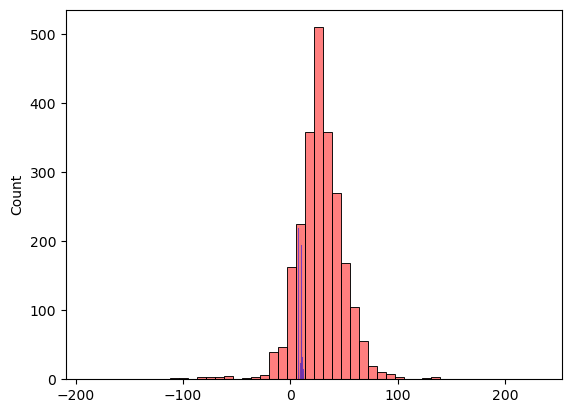

In [1382]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_val, color="blue", alpha=0.5, bins=50)

## Regularization: controlling the weights

In [1383]:
def train_linear_regression(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = (XTX_inv).dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [1384]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
w0, w

(6.28552228338358,
 array([ 1.74600249e-03,  1.10332142e-01, -5.11237449e-03, -5.92343267e-03,
        -5.03741010e-05, -9.62098425e-02, -7.88729126e-01, -8.93190469e-01,
        -6.20240807e-01, -4.23875982e-02,  1.77110977e-01,  1.38410049e-02,
        -9.97730668e-02, -1.07727258e-01, -4.61074097e-01,  6.91522026e-02,
        -3.27257190e-01, -5.40102830e-01, -9.20164632e-02,  1.09408181e+00,
         9.24541182e-01,  1.15485879e+00,  2.62173895e+00,  4.90965693e-01,
         1.60746586e+00,  1.53729700e+00,  1.60044307e+00,  1.54046186e+00,
        -8.49915450e-02,  4.57085001e-02, -4.80505494e-02, -3.56645197e-02,
         8.59610931e-03,  2.18059690e+00,  2.06544345e+00,  2.03959876e+00,
        -4.85503714e-02,  5.44848713e-02,  1.78239216e-01,  3.41908082e-01,
        -1.64425789e-01]))

In [1385]:
# predict validation data set
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
y_pred

array([10.26494702, 10.95026105, 10.10971964, ..., 10.68929961,
       10.13384182, 10.5955311 ])

In [1386]:
rmse(y_pred, y_val)

0.45651750869782065

<AxesSubplot:ylabel='Count'>

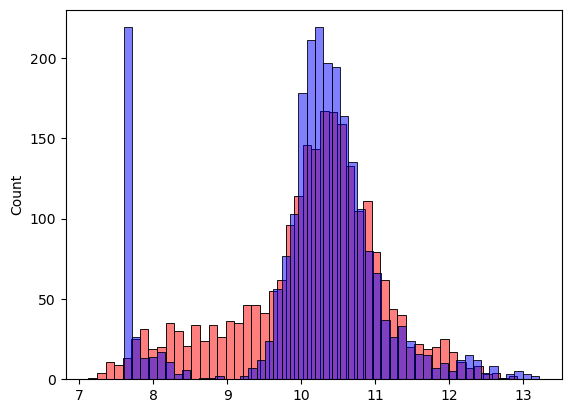

In [1387]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_val, color="blue", alpha=0.5, bins=50)

## Model Tunning: finding the best parameter for regularization

In [1388]:
r_list = [0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 1, 10, 100]

In [1389]:
# r= 0.001 is good
for r in r_list:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train, r)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score  = rmse(y_pred, y_val)
    print("R: {}\nw0: {}\nScore: {}\n\n".format(r, w0, score))

R: 0
w0: 1.0988239383087292e+16
Score: 29.712942828139816


R: 0.1
w0: 6.191208657249507
Score: 0.4565692763042894


R: 0.01
w0: 6.276604368943194
Score: 0.45652199012671885


R: 0.001
w0: 6.28552228338358
Score: 0.45651750869782065


R: 0.0001
w0: 6.3309463738171665
Score: 0.45651706293909966


R: 1e-05
w0: 9.263833364555508
Score: 0.4565170151153065


R: 1
w0: 5.634896667949306
Score: 0.45722043179967


R: 10
w0: 4.283980108969971
Score: 0.47014569320991545


R: 100
w0: 2.4990470830021456
Score: 0.5786709462476657




## Building the model with train and val dataset and r = 0.001

In [1390]:
df_full_train = pd.concat([df_train, df_val])
df_full_train.reset_index(drop=True, inplace=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [1391]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [1392]:
X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression(X_full_train, y_full_train, r=0.001)
w0, w

(6.321897140223779,
 array([ 1.52506334e-03,  1.18188694e-01, -6.66105724e-03, -5.33414117e-03,
        -4.87603196e-05, -9.69091849e-02, -7.92623108e-01, -8.90864322e-01,
        -6.35103033e-01, -4.14339218e-02,  1.75560737e-01, -5.78067084e-04,
        -1.00563873e-01, -9.27549683e-02, -4.66859089e-01,  7.98659955e-02,
        -3.16047638e-01, -5.51981604e-01, -7.89525255e-02,  1.09536726e+00,
         9.20059720e-01,  1.14963711e+00,  2.65277321e+00,  5.09996290e-01,
         1.62933899e+00,  1.53004304e+00,  1.61722175e+00,  1.54522114e+00,
        -9.70559788e-02,  3.73062078e-02, -5.81767461e-02, -2.35940808e-02,
        -1.19357029e-02,  2.18895262e+00,  2.07458271e+00,  2.05916687e+00,
        -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
        -1.58817038e-01]))

In [1393]:
#close rmse means the model is learning well
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_pred, y_test)

0.4517749304358022

## Using the Model

In [1394]:
sample_data = df_test.iloc[10].to_dict()
sample_data

{'make': 'mazda',
 'model': '3',
 'year': 2016,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 155.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'sedan',
 'highway_mpg': 41,
 'city_mpg': 29,
 'popularity': 586}

In [1395]:
X_sample = prepare_X(pd.DataFrame([sample_data]))
X_sample

array([[155.,   4.,  41.,  29., 586.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.]])

In [1396]:
y_pred = w0 + X_sample.dot(w)
y_pred = y_pred[0]
y_pred, np.expm1(y_pred)

(10.064069494308953, 23482.879694708747)

In [1397]:
y_test[10], np.expm1(y_test[10])

(9.789534672460096, 17844.999999999993)

In [1398]:
# difference from actual value
y_pred - y_test[10], np.expm1(y_pred) - np.expm1(y_test[10])

(0.2745348218488566, 5637.879694708754)